                      
          Assignment No 4 - Simple Linear Regression - Question no 1   

          Delivery_time -> Predict delivery time using sorting time 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.shape

(21, 2)

                         EDA & Data Visualization

In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.info()     #No Missing Values in data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\Gujar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

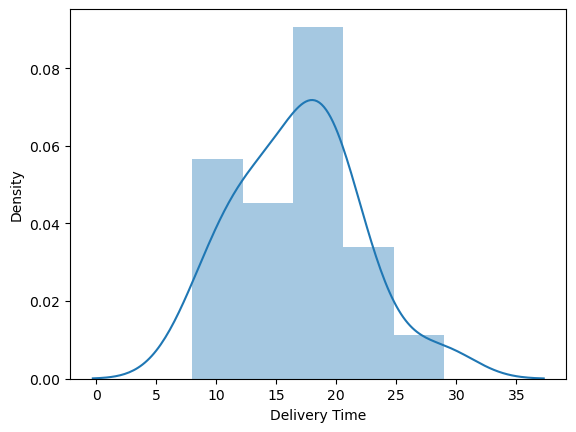

In [6]:
sns.distplot(data['Delivery Time'])

C:\Users\Gujar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

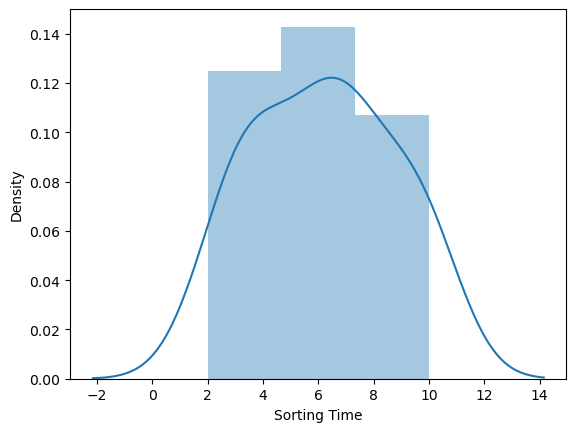

In [7]:
sns.distplot(data['Sorting Time'])

In [8]:
#Renaming the columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
#Print duplicates
data[data.duplicated()]   #No duplicates in the data.

,delivery_time,sorting_time


In [10]:
#Lets Check outliers in the data
Y = data['delivery_time']
Y

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: delivery_time, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x225ded2a7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x225ded2ad90>,
 'boxes': [<matplotlib.lines.Line2D at 0x225ded2a520>],
 'medians': [<matplotlib.lines.Line2D at 0x225ded3a370>],
 'fliers': [<matplotlib.lines.Line2D at 0x225ded3a640>],
 'means': []}

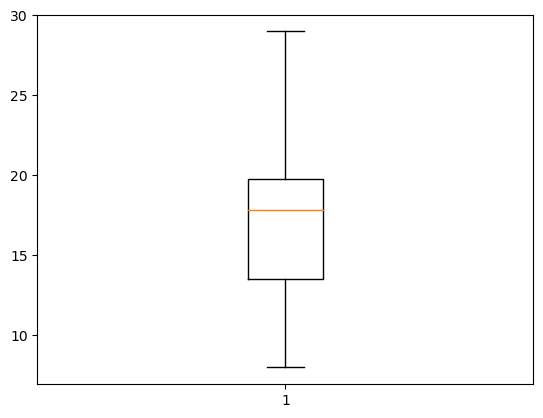

In [11]:
#visualization
plt.boxplot(Y)  #No Outliers in column "Delivery Time"

In [12]:
X = data["sorting_time"]
X

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: sorting_time, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x225ded98580>,
 'caps': [<matplotlib.lines.Line2D at 0x225ded98ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225ded982b0>],
 'medians': [<matplotlib.lines.Line2D at 0x225deda50a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225deda5370>],
 'means': []}

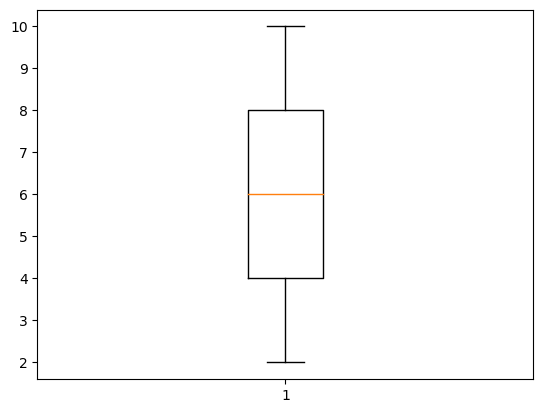

In [13]:
plt.boxplot(X)  #No Outliers in column "sorting time "

                              Correlation Analysis

In [14]:
data.corr()  #Good correlation between target & independent column as its close to value 1.

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


C:\Users\Gujar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

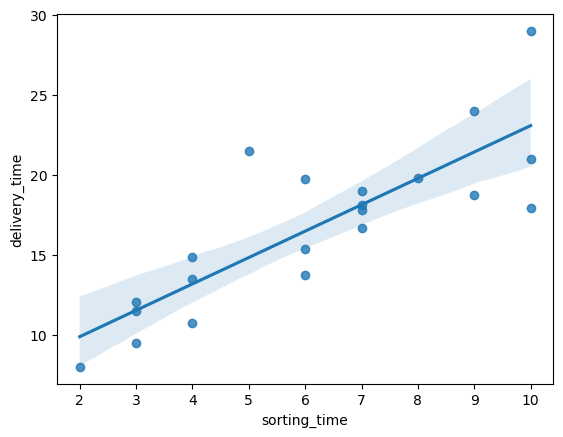

In [15]:
sns.regplot(X,Y)

                       Model Building

First Model - Ordinary Least Square (Y ~ X)

In [16]:
model1 = smf.ols("delivery_time ~ sorting_time", data=data).fit()

In [17]:
model1.params     #B0 + B1X , B0 = 6.58 , B1 = 1.64

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
model1.tvalues  #Tcal values

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [19]:
model1.pvalues  

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [20]:
prediction1= model1.predict(X)
r2_score(Y,prediction1)

0.6822714748417231

Second Model - Linear Regression

In [21]:
LR = LinearRegression()
X = data['sorting_time'].values.reshape(21,1)
Y = data['delivery_time'].values.reshape(21,1)
model2 = LR.fit(X,Y)

In [22]:
model2.intercept_ #B0

array([6.58273397])

In [23]:
model2.coef_  #B1

array([[1.6490199]])

In [24]:
prediction2= model2.predict(X)
r2_score(Y,prediction2)

0.6822714748417231

Third Model -  Ordinary Least Square -  Log(Y) ~ X

In [25]:
model3 = smf.ols("np.log(data['delivery_time']) ~ data['sorting_time']",data=data).fit()


In [26]:
model3.params

Intercept               2.121372
data['sorting_time']    0.105552
dtype: float64

In [27]:
model3.tvalues

Intercept               20.601357
data['sorting_time']     6.836088
dtype: float64

In [28]:
model3.pvalues

Intercept               1.857343e-14
data['sorting_time']    1.592708e-06
dtype: float64

In [29]:
prediction3 = model3.predict(data['sorting_time'])
prediction3 = np.exp(prediction3)

In [30]:
r2_score(data['delivery_time'], prediction3)

0.6475457259313306

Fourth Model - Ordinary Least Square - Log(Y) ~ X +.. X**2

In [31]:
data['sorting_time_square'] =data['sorting_time']**2
model4 = smf.ols("np.log(data['delivery_time']) ~ data['sorting_time'] + data['sorting_time_square']", data =data).fit()
model4.params 

Intercept                      1.699704
data['sorting_time']           0.265922
data['sorting_time_square']   -0.012841
dtype: float64

In [32]:
prediction4 = model4.predict(data['sorting_time'])


In [33]:
prediction4 = np.exp(prediction4)

In [34]:
r2_score(data['delivery_time'],prediction4)

0.6805867001076049

                   Interpretation

In [44]:
print("R2-score of Model 1:",r2_score(data['delivery_time'],prediction1),"\n"
      "R2-score of Model 2:",r2_score(data['delivery_time'],prediction2),"\n",
      "R2-score of Model 3:",r2_score(data['delivery_time'],prediction3),"\n",
      "R2-score of Model 4:",r2_score(data['delivery_time'],prediction4))

R2-score of Model 1: 0.6822714748417231 
R2-score of Model 2: 0.6822714748417231 
 R2-score of Model 3: 0.6475457259313306 
 R2-score of Model 4: 0.6805867001076049


 Model 1 & Model 2 has higher R2_square values. so model for Linear regression is Y = 6.58 + 1.64X
 So interpretation will be if X increases in number then Y will also increased by B1.
    There is positive correlation between two independent variable. but we cant say that its perfectly
    positive correlation.

            Model Prediction on new data

In [46]:
newdata = pd.Series([10,21])
data_pred = pd.DataFrame(newdata, columns =['sorting_time'])
data_pred

,sorting_time
0,10
1,21


In [47]:
model2.predict(data_pred)

C:\Users\Gujar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[23.07293294],
       [41.21215181]])